### Estudo de sistemas térmicos
Esse estudo busca responder às seguintes perguntas:
- Qual a influência da condutividade térmica no tempo necessário para o derretimento do gelo?
- Em quais materiais, como isopor, madeira, vidro, ferro, entre outros, o gelo derrete mais rapidamente?
- Quanto tempo leva para o gelo derreter em um prato de porcelana?

In [40]:
#Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

Parâmetros relevantes para a análise:
- Transferencia convectiva do ar
- Temperatura ambiente
- Calor latente do gelo
- Calor específico da água
- Densidade
- Condutividade térmica da superfície de porcelana

Considere um cubo de 3x3x3cm.

In [41]:
Har = 20        # W/m2
Ta = 19+273     # K 
Lagua = 80*4200 # J/kg
C = 1*4200      # J/kg.K
D = 1e3         # kg/m3 
kp = 3          # W/mK
d = 5e-3        # m

# Condições iniciais de massa e temperatura
T_0 = -3+273
M_0 = 30e-3

Função com o modelo, que possui origem em análises físicas:

In [42]:
def modelo(x,t):
    T = x[0]      #Temperatura do gelo
    M = x[1]      #Massa do gelo
    
    l = (M/D)**(1/3) # Lado do gelo em função da massa
    A = 5*l**2       # Área do gelo em contato com o ar
    a = l**2         # Área do gelo em contato com o prato
    Qcv = Har * A * (Ta - T)
    Qcd = (kp * a)/d *(Ta - T)
    if T<273:
        dTdt = 1/(M*C) * (Qcv + Qcd)
        dMdt = 0
    else:
        dTdt = 0
        dMdt = -1/Lagua * (Qcv+Qcd)
    
    dxdt = [dTdt, dMdt]
    return dxdt

Por fim, a função odeint calcula o sistema de equações:

In [43]:
x_0 = [T_0, M_0]           # Lista com condições iniciais

t_lista = np.arange(60*25) # 25 minutos

x = odeint(modelo,x_0,t_lista)
T = x[:,0]
M = x[:,1]

Sob análise gráfica dos dados obtidos pelo modelo:

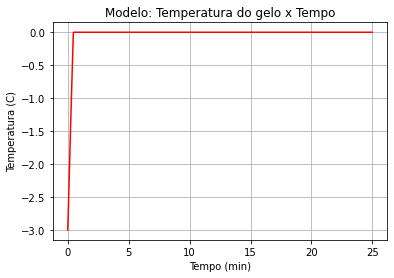

In [44]:
plt.plot(t_lista/60,T-273, 'r', label = 'Temperatura do gelo')
plt.title("Modelo: Temperatura do gelo x Tempo")
plt.ylabel("Temperatura (C)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.show()


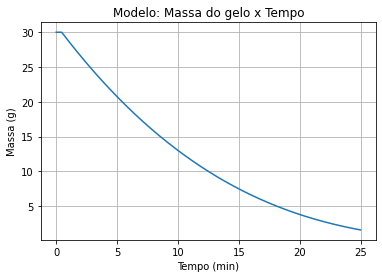

In [45]:
plt.plot(t_lista/60,M*1e3, label = 'Massa do gelo')
plt.title("Modelo: Massa do gelo x Tempo")
plt.ylabel("Massa (g)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.show()

# Gráficos conclusivos
Os gráficos conclusivos visam responder às questões motivadoras do estudo.

Agora, consideraremos  uma variação no coeficiente de condutividade térmica da superfície na qual o gelo está.
    Para isso vamos considerara uma lista de coeficientes k:
                                
                                           k = [0, 10, 20, ..., 90, 100]

In [46]:
lista_k = np.arange(0, 110, 5)

É implementado um novo modelo adicionando como argumento o coeficiente de condutividade arbitrário *k*    

In [47]:
def modelo2(x, t, k):
    T = x[0]      #Temperatura do gelo
    M = x[1]      #Massa do gelo
    
    if M <= 0:
        dTdt = 0
        dMdt = 0
    else:
        l = (M/D)**(1/3) # Lado do gelo em função da massa
        A = 5*l**2       # Área do gelo em contato com o ar
        a = l**2         # Área do gelo em contato com o prato
        Qcv = Har * A * (Ta - T)
        Qcd = (k * a)/d *(Ta - T)
        if T<273:
            dTdt = 1/(M*C) * (Qcv + Qcd)
            dMdt = 0
        else:
            dTdt = 0
            dMdt = -1/Lagua * (Qcv+Qcd)


    
    dxdt = [dTdt, dMdt]
    return dxdt

Com isso, pode-se responder a influência do coeficiente de condutividade térmica (k)

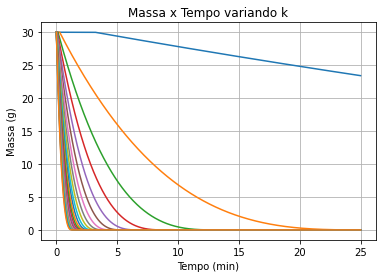

In [52]:
for k in lista_k:
    odebas = odeint(modelo2, x_0, t_lista, args=(k,), mxordn = 1)
    massas = odebas[:, 1]
    plt.plot(t_lista/60, massas*1e3, label=('k={}'.format(k)))
plt.xlabel('Tempo (min)')
plt.ylabel('Massa (g)')
plt.title("Massa x Tempo variando k")

plt.grid(True)
plt.show()

Observa-se, assim, que o k é responsável pela velocidade do derretimento do gelo.

Para responder as próximas questões, é necessário obter o dado do tempo de derretimento do gelo. Esse é o objetivo da função a seguir, que guarda o minuto em que a massa do gelo se aproxima de zero:

In [53]:
def massa_0(lista_m,t_lista):
    for i in range(len(lista_m)):
        if lista_m[i] <= 0.02*lista_m[0]:
            return t_lista[i]/60
            

Com isso, é possível analisar graficamente o tempo de derretimento para diferentes valores de condutividade térmica. A seguir apontamos a faixa de condutividade térmica dos materiais citados na introdução, para fins de análise.
- Vidro: possui a menor condutividade térmica, abaixo de 20 [W/m.K]
- Aço: possui condutividade térmica entre 40 [W/m.K] e 60 [W/m.K]
- Ferro: possui a maior condutividade térmica, a partir de 80 [W/m.K], e menor tempo de derretimento

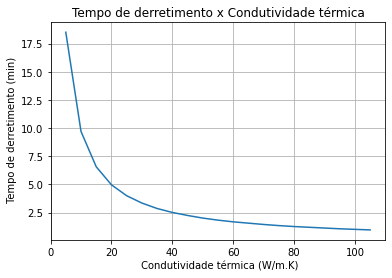

In [57]:
lista_massas_0 = []
for k in lista_k:
    odebas = odeint(modelo2, x_0, t_lista, args=(k,), mxordn = 1)
    lista_massas_0.append(massa_0(odebas[:,1],t_lista))
plt.plot(lista_k, lista_massas_0)
plt.title("Tempo de derretimento x Condutividade térmica")
plt.xlabel(' Condutividade térmica (W/m.K)')
plt.ylabel(' Tempo de derretimento (min)')
plt.grid(True)
plt.show()

Por fim, adicionamos uma comparação dos dados obtidos experimentalmente com os dados do nosso modelo

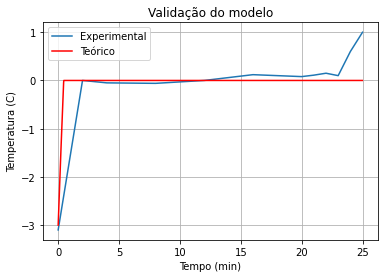

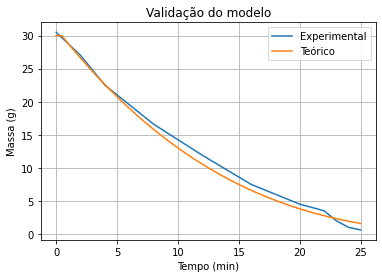

In [60]:
dadosT = [-3.1, 0,-0.05,-0.06,0,0.12,0.08,0.11,0.15,0.1,0.6,1]

dadost = [0, 2, 4, 8, 12, 16, 20, 21, 22, 23, 24, 25]
plt.plot(dadost,dadosT, '-', label = 'Experimental')
plt.plot(t_lista/60,T-273, 'r', label = 'Teórico')
plt.title("Validação do modelo")
plt.ylabel("Temperatura (C)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.legend()
plt.show()

dadosM = [30.5, 27, 22.5, 16.6, 11.9, 7.5, 4.5, 4, 3.5, 2, 1,0.6]
plt.plot(dadost,dadosM, '-', label = 'Experimental')
plt.title("Validação do modelo")
plt.plot(t_lista/60,M*1e3, label = 'Teórico')
plt.ylabel("Massa (g)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.legend()
plt.show()
